In [1]:
import tensorflow as tf

In [2]:
print(f'wersja tf: {tf.__version__}')

wersja tf: 2.10.1


In [3]:
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


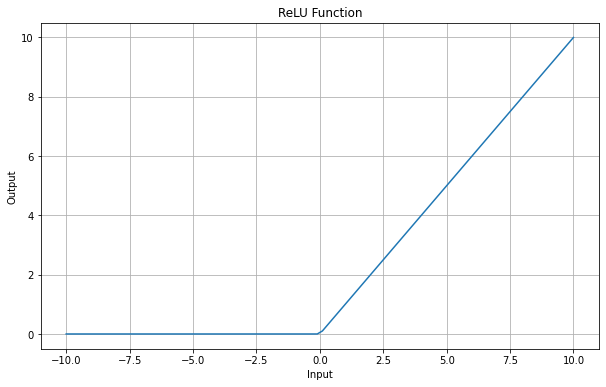

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def relu(x):
    return max(0.0, x)

values = np.linspace(-10, 10, 100)
relu_values = [relu(val) for val in values]

plt.figure(figsize=(10,6))

plt.plot(values, relu_values)
plt.title('ReLU Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2904 - accuracy: 0.9156
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1417 - accuracy: 0.9580
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1060 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9726
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0737 - accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - accuracy: 0.9799
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0569 - accuracy: 0.9820
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9828
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0474 - accuracy: 0.9845
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.044

In [12]:
#ocena modelu
test_loss,test_accuracy = model.evaluate(x_test,y_test,verbose=2)
print(f'strata-> loss: {test_loss}')
print(f'dokładność-> accuracy: {test_accuracy}')

313/313 - 0s - loss: 0.0664 - accuracy: 0.9803 - 412ms/epoch - 1ms/step
strata-> loss: 0.06640522181987762
dokładność-> accuracy: 0.9803000092506409


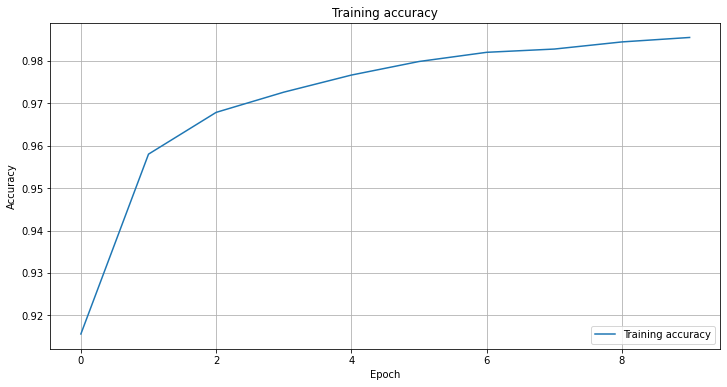

In [13]:
# New Python cell
import matplotlib.pyplot as plt

# Retrieve a list of accuracy results on training data
acc = history.history['accuracy']

# Get the number of epochs
epochs = range(len(acc))

# Plot training accuracy per epoch
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

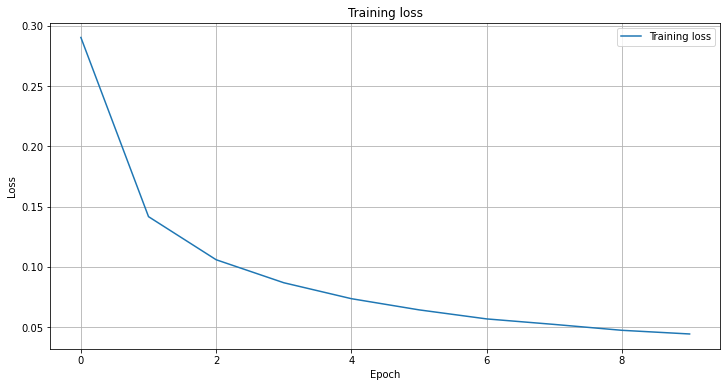

In [14]:
# Retrieve a list of list results on training data
loss = history.history['loss']

# Get the number of epochs
epochs = range(len(loss))

# Plot training loss per epoch
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()